# **Titanic Data Analysis in Python**
## Part I: Exploratory analysis (3 points)
#### Juan David Botero
---

Read the dataset correctly using pandas, using an appropriate column as index (1 point)

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [15]:
titanic = pd.read_csv(
    "train.csv", 
    index_col = "PassengerId")
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## PLOTS

In [21]:
titanic["AgedBinned"] = pd.cut(titanic["Age"], range(0, 90, 10))
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgedBinned
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"(20, 30]"
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"(30, 40]"
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(20, 30]"
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"(30, 40]"
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"(30, 40]"


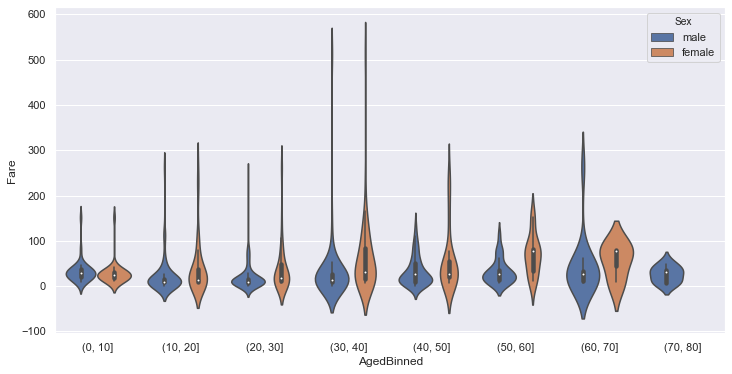

In [25]:
fig, ax = plt.subplots(figsize=(12, 6))

sns.violinplot(x="AgedBinned", y="Fare", hue="Sex", data=titanic, ax=ax)

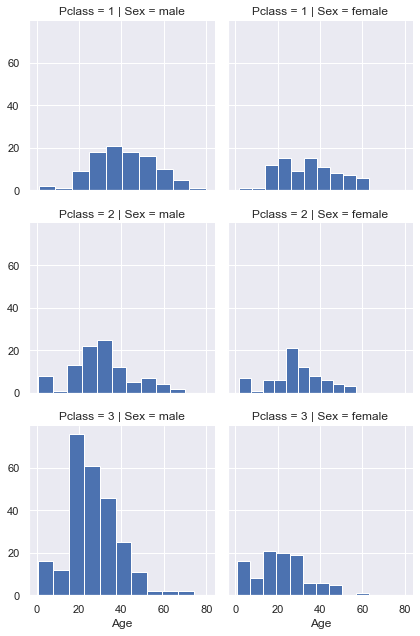

In [19]:
grid = sns.FacetGrid(titanic, row="Pclass", col="Sex")
grid.map(plt.hist, "Age");

**Compute the percentage of survivors out of total number of passengers and the percentage of men and women out of total number of passengers (0.5 points)**

In [278]:
# General total numbers to understand the Titanic dataset
num_survived = titanic['Survived'].sum()
total_passangers = titanic['Survived'].count()
deaths = (titanic['Survived'] == 0).sum()
percent_survivors = round(((num_survived / total_passangers) * 100), ndigits = 2)

print("The total number of survivors where:", num_survived)
print("The total number of passangers where:", total_passangers)
print("Which gives us that:", percent_survivors,"% survived the Titanic")
print("Unfortunately", deaths, "people died in the Titanic")


The total number of survivors where: 342
The total number of passangers where: 891
Which gives us that: 38.38 % survived the Titanic
Unfortunately 549 people died in the Titanic


**Compute the percentage of survivors by sex (i.e. the percentage of male passengers that survived and female passengers that survived) and the percentage of survivors that were men and women (0.5 points)**

In [279]:

# % of males survivors over total males

males = (titanic['Sex'] == 'male').sum()
males_1 = ((titanic['Sex'] == 'male') & (titanic['Survived'] == 1)).sum()

print("The numer of males where", males, "and the percentage of male passengers that survived where:", 
      round(((males_1/males)* 100),ndigits = 2),"%", "\n")


# % of females survivors over total females

females = (titanic['Sex'] == 'female').sum()
females_1 = ((titanic['Sex'] == 'female') & (titanic['Survived'] == 1)).sum()

print("The numer of females where", females, "and the percentage of female passengers that survived where:", 
      round(((females_1/females)* 100),ndigits = 2),"%", "\n")


# % of survivors based on gender

print("The percentage of survivors that were males where:", 
      round(((males_1/num_survived)* 100),ndigits = 2),
      "%","\n", "while the percentage for females where:",
      round(((females_1/num_survived)* 100),ndigits = 2),
      "%. More than 2x of males", "\n")


# By Gender deaths

print("The number of males that died where:", males-males_1, "but", males_1, "survived", "\n") 
print("The number of females that died where:",females-females_1, "but", females_1, "survived")


The numer of males where 577 and the percentage of male passengers that survived where: 18.89 % 

The numer of females where 314 and the percentage of female passengers that survived where: 74.2 % 

The percentage of survivors that were males where: 31.87 % 
 while the percentage for females where: 68.13 %. More than 2x of males 

The number of males that died where: 468 but 109 survived 

The number of females that died where: 81 but 233 survived


**Display in a 2 x 2 DataFrame the probability of being male/female and surviving/not surviving (0.5 points)**

In [280]:
gender_df = pd.DataFrame({
    "%_Survived": [round((males_1/total_passangers)*100,ndigits = 2), 
                   round((females_1/total_passangers)*100,ndigits = 2)],
    
    "%_Not_Survived": [round(((males-males_1)/total_passangers)*100,ndigits = 2), 
                       round(((females-females_1)/total_passangers)*100,ndigits = 2)]},
    
    index = ["Male", "Female"]
)
gender_df

,%_Survived,%_Not_Survived
Male,12.23,52.53
Female,26.15,9.09


**Display in a DataFrame the probability of survival/not survival of all combinations of sex and class (0.5 points)**

Here we use the group_by to group the data based on: Sex, Pclass and Survived.

We then count by name to get the total number in each group

In [281]:
titanic.groupby([
    "Sex", "Pclass", "Survived"
])["Name"].count().unstack()

Survived         0   1
Sex    Pclass         
female 1         3  91
       2         6  70
       3        72  72
male   1        77  45
       2        91  17
       3       300  47

Finally to get our answer, a lambda function is used to divide the number by the total passangers of the Titanic.

In [282]:
titanic.groupby([
    "Sex", "Pclass", "Survived"
])["Name"].count().unstack().transform(lambda x: round((x / titanic['Survived'].count())*100,ndigits = 2))

Survived           0      1
Sex    Pclass              
female 1        0.34  10.21
       2        0.67   7.86
       3        8.08   8.08
male   1        8.64   5.05
       2       10.21   1.91
       3       33.67   5.27

## Part II: Imputing missing values (2 points)
---

Devise some strategy to impute the missing values in the Age column.

In [283]:
# Check the columns with NA's
titanic.isnull().any()

Survived    False
Pclass      False
Name        False
Sex         False
Age          True
SibSp       False
Parch       False
Ticket      False
Fare        False
Cabin        True
Embarked     True
dtype: bool

In [284]:
# Check the total NA's in each column
titanic.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [285]:
# Dive into the "Age" column
titanic["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [259]:
# Group_by "Sex", "Pclass", "Survived" and .describe the "Age" column to check the distribution.
titanic.groupby([
    "Sex", "Pclass", "Survived"
])["Age"].describe()

count       mean        std    min    25%   50%  \
Sex    Pclass Survived                                                    
female 1      0           3.0  25.666667  24.006943   2.00  13.50  25.0   
              1          82.0  34.939024  13.223014  14.00  23.25  35.0   
       2      0           6.0  36.000000  12.915107  24.00  26.25  32.5   
              1          68.0  28.080882  12.764693   2.00  21.75  28.0   
       3      0          55.0  23.818182  12.833465   2.00  15.25  22.0   
              1          47.0  19.329787  12.303246   0.75  13.50  19.0   
male   1      0          61.0  44.581967  14.457749  18.00  33.00  45.5   
              1          40.0  36.248000  14.936744   0.92  27.00  36.0   
       2      0          84.0  33.369048  12.158125  16.00  24.75  30.5   
              1          15.0  16.022000  19.547122   0.67   1.00   3.0   
       3      0         215.0  27.255814  12.135707   1.00  20.00  25.0   
              1          38.0  22.274211  11.555786   0.42  16.50  25.0   

                          75%   max  
Sex    Pclass Survived               
female 1      0         37.50  50.0  
              1         44.00  63.0  
       2      0         42.50  57.0  
              1         35.25  55.0  
       3      0         31.00  48.0  
              1         26.50  63.0  
male   1      0         56.00  71.0  
              1         48.00  80.0  
       2      0         39.00  70.0  
              1         31.50  62.0  
       3      0         34.00  74.0  
              1         29.75  45.0

Based on the information above I believe that a good predictor of NA's for each class will be the ``median``, because the *mean is too misleading* based on the many outliers we have for some classes.

In [286]:
# Get the median for each class
titanic.groupby([
    "Sex", "Pclass", "Survived"
])["Age"].median()

Sex     Pclass  Survived
female  1       0           25.0
                1           35.0
        2       0           32.5
                1           28.0
        3       0           22.0
                1           19.0
male    1       0           45.5
                1           36.0
        2       0           30.5
                1            3.0
        3       0           25.0
                1           25.0
Name: Age, dtype: float64

In [287]:
# Count to see how many NA's there are for each class
titanic[titanic["Age"].isnull()].groupby([
    "Sex", "Pclass", "Survived"
])["Name"].count()

Sex     Pclass  Survived
female  1       1            9
        2       1            2
        3       0           17
                1           25
male    1       0           16
                1            5
        2       0            7
                1            2
        3       0           85
                1            9
Name: Name, dtype: int64

In [294]:
# We use .transform to fillna of the "Age" column with the median of the groups and assign the output
titanic["Age"] = titanic.groupby(["Sex", 
                                  "Pclass", 
                                  "Survived"])["Age"].transform(lambda x: x.fillna(x.median()))

In [295]:
# Check if there are any missing values
titanic["Age"].isnull().sum()

0

In [297]:
# Doble-check just to be sure...count = 891
titanic["Age"].describe()

count    891.000000
mean      29.071459
std       13.488772
min        0.420000
25%       21.000000
50%       26.000000
75%       36.000000
max       80.000000
Name: Age, dtype: float64

# Thanks!